# **Advanced**

In [1]:
!pip install skope-rules
!pip install cubist
!pip install eli5
!pip install scikit-plot

     |████████████████████████████████| 489 kB 16.5 MB/s 
     |████████████████████████████████| 106 kB 7.7 MB/s 


In [3]:
#Import Library
import pandas as pd

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# Lload k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
#load logistic regression model
from sklearn.linear_model import LogisticRegression

# load navie bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5
#Load data link csv dari github
url = 'https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/marketing_campaign_response_model/marketing_campaign.csv'
df = pd.read_csv(url, index_col=0)
df = pd.read_csv(url, sep=";")

#Check data
df.head(5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# **Preprocessing Data**

In [14]:
# remove 'ID', 'Year_Birth', 'Dt_Customer' from dataset
# Those variable are not relevan from domain knowladge 
mr_data = df.drop(
    ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'],
    axis = 1
)

# check its first 5 rows
mr_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,0,0,0,0,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,0,0,0,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,0,0,0,0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,0,0,0,0,0


In [15]:
# count 'Response' class frequencies
mr_data['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [16]:
#Check missing value
mr_data.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
#df['col'] = df['col'].fillna(0)
#df['col'] = df['col'].astype(np.int64)

In [17]:
mr_data['Income'] = mr_data['Income'].fillna(0).astype(np.int64).reset_index(drop=True)

In [18]:
mr_data = mr_data.reset_index(drop=True)

In [19]:
mr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education            2240 non-null   object
 1   Marital_Status       2240 non-null   object
 2   Income               2240 non-null   int64 
 3   Kidhome              2240 non-null   int64 
 4   Teenhome             2240 non-null   int64 
 5   Recency              2240 non-null   int64 
 6   MntWines             2240 non-null   int64 
 7   MntFruits            2240 non-null   int64 
 8   MntMeatProducts      2240 non-null   int64 
 9   MntFishProducts      2240 non-null   int64 
 10  MntSweetProducts     2240 non-null   int64 
 11  MntGoldProds         2240 non-null   int64 
 12  NumDealsPurchases    2240 non-null   int64 
 13  NumWebPurchases      2240 non-null   int64 
 14  NumCatalogPurchases  2240 non-null   int64 
 15  NumStorePurchases    2240 non-null   int64 
 16  NumWeb

# **Simple EDA**

In [22]:
# check correlation matrix of mr_data
mr_data.corr()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Income,1.000000,-0.424723,0.015498,-0.010603,0.570851,0.421910,0.565318,0.431879,0.424761,0.312600,...,0.579830,0.521456,-0.535452,-0.009682,0.174512,0.329995,0.267087,0.088132,-0.024489,0.136389
Kidhome,-0.424723,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,...,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008
Teenhome,0.015498,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,...,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446
Recency,-0.010603,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,...,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437
MntWines,0.570851,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,...,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254
MntFruits,0.421910,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,...,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289
MntMeatProducts,0.565318,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,...,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335
MntFishProducts,0.431879,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,...,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331
MntSweetProducts,0.424761,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,0.369724,...,0.490924,0.448756,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,0.117372
MntGoldProds,0.312600,-0.349595,-0.021725,0.016693,0.387516,0.392995,0.350609,0.422875,0.369724,1.000000,...,0.437697,0.381678,-0.250719,0.123091,0.022268,0.181021,0.166396,0.049990,-0.030861,0.139850


Data variable yang memiliki multikolineritas adalah NumCatalogPurchases  dengan variable MntMeatProducts tetapi untuk variable NumCatalogPurchases (0.220810) memiliki korelasi yang lebih rendah dari variable MntMeatProducts (0.236335) terhadap Response, maka untuk variable NumCatalogPurchases (0.220810) di drop

In [24]:
# remove 'ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue' from dataset
# Those variable are not relevan from domain knowladge 
# This 'NumCatalogPurchases' variable has muliticolinarity from variable response 
mr_data = df.drop(
    ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'NumCatalogPurchases'],
    axis = 1
)

# check its first 5 rows
mr_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,8,4,7,0,0,0,0,0,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,8,10,4,0,0,0,0,0,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,2,4,6,0,0,0,0,0,0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,6,5,0,0,0,0,0,0,0


# Check Data Duplicate

In [25]:
mr_data.duplicated().sum()

182

In [26]:
mr_data.drop_duplicates(inplace=True)

In [27]:
mr_data.duplicated().sum()

0

In [28]:
mr_data = mr_data.reset_index(drop=True)

In [29]:
mr_data.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,8,4,7,0,0,0,0,0,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,8,10,4,0,0,0,0,0,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,2,4,6,0,0,0,0,0,0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,6,5,0,0,0,0,0,0,0


Linear regression only work with numerical data, so to handle categorical data we need to transform them to integer (for ordinal data) or treat them as dummy variables.

In [44]:
# turn Education column into dummy variables
pd.get_dummies(mr_data['Education'])

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2053,0,0,1,0,0
2054,0,0,1,0,0
2055,0,0,1,0,0
2056,0,0,0,1,0


In [45]:
# transform Education column into new column (is_Education)
mr_data['Education'].apply(lambda x: 1 if x == "Education" else 0)

0       0
1       0
2       0
3       0
4       0
       ..
2053    0
2054    0
2055    0
2056    0
2057    0
Name: Education, Length: 2058, dtype: int64

In [67]:
# let's use dummy variables by eliminating Non Easter feature
dummy_var = pd.get_dummies(mr_data['Education'])[['2n Cycle', 'Basic', 'Graduation',	'Master', 'PhD']]
# check dummy_var
dummy_var

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2053,0,0,1,0,0
2054,0,0,1,0,0
2055,0,0,1,0,0
2056,0,0,0,1,0


In [162]:
market_sampel_data = pd.concat([mr_data, dummy_var], axis = 1)

# check eggs_sales_data after data binding
market_sampel_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,2n Cycle,Basic,Graduation,Master,PhD
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,0,0,1,0,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,1,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,1,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,1,0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,0,0,1


In [163]:
# drop certain columns
market_sampel_data = market_sampel_data.drop(
    ['Education', 'Marital_Status'], 
    axis = 1
)
market_sampel_data.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,2n Cycle,Basic,Graduation,Master,PhD
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,0,0,1


In [181]:
market_sampel_data['Income'] = market_sampel_data['Income'].fillna(0).astype(np.int64).reset_index(drop=True)

In [182]:
market_sampel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Income             2058 non-null   int64
 1   Kidhome            2058 non-null   int64
 2   Teenhome           2058 non-null   int64
 3   Recency            2058 non-null   int64
 4   MntWines           2058 non-null   int64
 5   MntFruits          2058 non-null   int64
 6   MntMeatProducts    2058 non-null   int64
 7   MntFishProducts    2058 non-null   int64
 8   MntSweetProducts   2058 non-null   int64
 9   MntGoldProds       2058 non-null   int64
 10  NumDealsPurchases  2058 non-null   int64
 11  NumWebPurchases    2058 non-null   int64
 12  NumStorePurchases  2058 non-null   int64
 13  NumWebVisitsMonth  2058 non-null   int64
 14  AcceptedCmp3       2058 non-null   int64
 15  AcceptedCmp4       2058 non-null   int64
 16  AcceptedCmp5       2058 non-null   int64
 17  AcceptedCmp1  

In [183]:
# train-test split
y = market_sampel_data['Response'].values
X = market_sampel_data.drop(['Response'], axis = 1).values

In [ ]:
y.value_counts

In [184]:
y

array([1, 0, 0, ..., 0, 0, 1])

In [185]:
X

array([[58138,     0,     0, ...,     1,     0,     0],
       [46344,     1,     1, ...,     1,     0,     0],
       [71613,     0,     0, ...,     1,     0,     0],
       ...,
       [56981,     0,     0, ...,     1,     0,     0],
       [69245,     0,     1, ...,     0,     1,     0],
       [52869,     1,     1, ...,     0,     0,     1]])

In [186]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 1000
)

In [187]:
X_train.shape

(1440, 25)

In [188]:
X_test.shape

(618, 25)

In [189]:
y_train.shape

(1440,)

In [190]:
y_test.shape

(618,)

Logistic Regression

In [191]:
# Modeling
X_train_int = sm.add_constant(X_train)
linear_reg_sm = sm.OLS(y_train, X_train_int).fit()

In [192]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler()
X_under, y_under = undersampling.fit_resample(X_train,y_train)

**Modeling using StatsModel**

Logit param:
```python
statsmodels.discrete.discrete_model.Logit(endog, exog, offset=None, check_rank=True, **kwargs)
```

In [193]:
X_train_int = sm.add_constant(X_train)
logistic_reg_sm = sm.Logit(y_train, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.276058
         Iterations 8


In [194]:
# check summary of model
logistic_reg_sm.summary2()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.345     
Dependent Variable: y                AIC:              845.0461  
Date:               2022-04-18 16:23 BIC:              976.8560  
No. Observations:   1440             Log-Likelihood:   -397.52   
Df Model:           24               LL-Null:          -606.96   
Df Residuals:       1415             LLR p-value:      9.8827e-74
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -2.4629        nan       nan      nan       nan       nan
x1         0.0000     0.0000    0.0536   0.9573   -0.0000    0.0000
x2        -0.2309     0.2563   -0.9008   0.3677   -0.7333    0.2715
x3        -1.0045     0.2320   -4.3299   0.0000   -1.4592   -0.5498
x4        -0.0294     0.0036   -8.2406   0.0000   -0.0363   -0.0224
x5        -0.0003     0.0004   -0.6445   0.5193   -0.0011    0.0006
x6         0.0023     0.0029    0.7782   0.4364   -0.0035    0.0080
x7         0.0025     0.0005    4.6789   0.0000    0.0014    0.0035
x8        -0.0012     0.0022   -0.5399   0.5893   -0.0055    0.0031
x9         0.0030     0.0026    1.1694   0.2422   -0.0020    0.0080
x10        0.0028     0.0019    1.4839   0.1378   -0.0009    0.0066
x11        0.1662     0.0597    2.7834   0.0054    0.0492    0.2833
x12        0.0699     0.0359    1.9451   0.0518   -0.0005    0.1403
x13       -0.1205     0.0429   -2.8076   0.0050   -0.2046   -0.0364
x14        0.2124     0.0528    4.0213   0.0001    0.1089    0.3159
x15        2.0696     0.2735    7.5664   0.0000    1.5335    2.6058
x16        0.9507     0.3293    2.8875   0.0039    0.3054    1.5961
x17        1.8788     0.3356    5.5975   0.0000    1.2209    2.5367
x18        1.2682     0.3434    3.6929   0.0002    0.5951    1.9413
x19        1.8246     0.7094    2.5719   0.0101    0.4341    3.2150
x20       -0.1684     1.1678   -0.1442   0.8853   -2.4574    2.1205
x21       -0.5998        nan       nan      nan       nan       nan
x22       -2.2027        nan       nan      nan       nan       nan
x23       -0.3975        nan       nan      nan       nan       nan
x24        0.2677        nan       nan      nan       nan       nan
x25        0.4695        nan       nan      nan       nan       nan
=================================================================

"""

In [195]:
# check model coefficient
logistic_reg_sm.params

array([-2.46290124e+00,  2.06882819e-07, -2.30909643e-01, -1.00453588e+00,
       -2.93502648e-02, -2.72127596e-04,  2.28389344e-03,  2.49464436e-03,
       -1.19617183e-03,  3.00540514e-03,  2.83215848e-03,  1.66220957e-01,
        6.98692623e-02, -1.20463545e-01,  2.12375769e-01,  2.06964430e+00,
        9.50736104e-01,  1.87880442e+00,  1.26821999e+00,  1.82456722e+00,
       -1.68442889e-01, -5.99846905e-01, -2.20273648e+00, -3.97470884e-01,
        2.67689260e-01,  4.69464557e-01])

LogisticRegression param:
```python
sklearn.linear_model.LogisticRegression(
  penalty='l2', *, dual=False, 
  tol=0.0001, C=1.0, 
  fit_intercept=True, intercept_scaling=1, 
  class_weight=None, random_state=None, 
  solver='lbfgs', max_iter=100, 
  multi_class='auto', verbose=0, 
  warm_start=False, n_jobs=None,
  l1_ratio=None
)
```

In [ ]:
# define logistic regression model
logistic_reg = LogisticRegression(random_state=1000)
# fit model to data
logistic_reg.fit(X_train, y_train)

In [197]:
# check model coefficient
logistic_reg.coef_

array([[-2.99603340e-05, -2.21871535e-04, -2.97745915e-04,
        -3.23315453e-02,  1.68726414e-03,  1.14610116e-03,
         2.98814385e-03, -3.70953593e-03,  3.35314309e-03,
         1.92184592e-03, -7.16271847e-04, -2.16946002e-04,
        -1.87980772e-03, -1.75028028e-03,  2.01020136e-04,
         1.18400014e-04,  2.28390850e-04,  1.90035555e-04,
         5.23995304e-05, -6.09150804e-07, -5.26683787e-05,
        -6.31584475e-05, -2.09622967e-04, -3.27852649e-05,
         4.40406009e-05]])

In [198]:
# check model intercept
logistic_reg.intercept_

array([-0.0003142])

In [199]:
# predict
pred_result = logistic_reg.predict(X_test)
pred_proba_result = logistic_reg.predict_proba(X_test)

In [200]:
# evaluate model accuracy from statsmodels
logistic_reg.score(X_train, y_train)

0.8569444444444444

In [201]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.843042071197411

In [202]:
# check confusion matrix
metrics.confusion_matrix(y_test, pred_result)

array([[507,  13],
       [ 84,  14]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


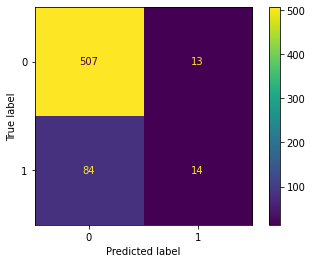

In [203]:
# plot confusion matrix using scikit-learn module
metrics.plot_confusion_matrix(logistic_reg, X_test, y_test);  

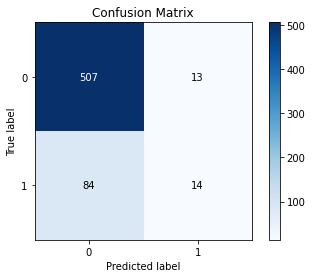

In [204]:
# visualize confusion matrix using scikit-plot
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

##### [METRIC MODEL EVALUATION] #####

Ketepatan Model Memprediksi : 0.84

[Matrix Confusion]
customer positif yang merespon campaign yang diprediksi Benar oleh Model sejumlah 507
customer positif yang merespon campaign yang diprediksi Salah oleh Model sejumlah 13
customer Negatif yang merespon campaign yang diprediksi Benar oleh Model sejumlah 84
Donatur Negatif yang merespon campaign yang diprediksi Salah oleh Model sejumlah 14

Nilai Recall sebesar 0.14285714285714285

Nilai F1 Score sebesar 0.22399999999999998 

In [205]:
# check model precision
metrics.precision_score(y_test, pred_result)

0.5185185185185185

In [206]:
# check model recall
metrics.recall_score(y_test, pred_result)

0.14285714285714285

In [207]:
# check f1_score
metrics.f1_score(y_test, pred_result)

0.22399999999999998

In [208]:
# create classification report
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857868,0.518519,0.843042,0.688193,0.804055
recall,0.975000,0.142857,0.843042,0.558929,0.843042
f1-score,0.912691,0.224000,0.843042,0.568346,0.803481
support,520.000000,98.000000,0.843042,618.000000,618.000000


In [209]:
# generate probability prediction
pred_proba_result = logistic_reg.predict_proba(X_test)

In [210]:
# check result
pd.DataFrame(pred_proba_result).head(10)

,0,1
0,0.727546,0.272454
1,0.970338,0.029662
2,0.953749,0.046251
3,0.891693,0.108307
4,0.865863,0.134137
5,0.726215,0.273785
6,0.683717,0.316283
7,0.620741,0.379259
8,0.975677,0.024323
9,0.923708,0.076292


In [211]:
# check AUC score
metrics.roc_auc_score(y_test, pred_proba_result[:,1])

0.7231456043956045

In [212]:
# check first 10 prediction of class 1
pred_proba_result[:10,1]

array([0.27245444, 0.0296619 , 0.04625084, 0.1083075 , 0.13413749,
       0.27378489, 0.31628303, 0.3792585 , 0.02432312, 0.07629168])

ROC Curve

ROC Curve Using Scikit-Learn

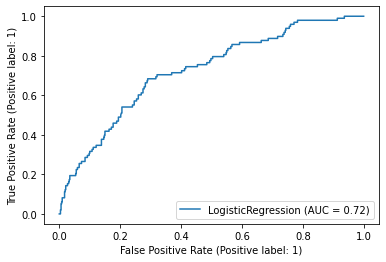

In [213]:
metrics.RocCurveDisplay.from_estimator(logistic_reg, X_test, y_test)

ROC Curve From Scikit-Plot

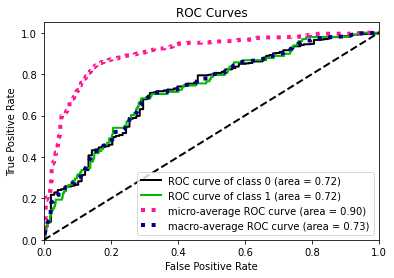

In [214]:
skplt.metrics.plot_roc(y_test, pred_proba_result)

Handle Imbalance Class Dataset with G-Means

In [215]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])

In [216]:
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))

In [217]:
# see gmeans result
gmeans

array([0.        , 0.        , 0.        , 0.14258215, 0.14244446,
       0.22522447, 0.22500654, 0.24648232, 0.24624336, 0.28433734,
       0.28323097, 0.33211775, 0.33179262, 0.34654609, 0.34620617,
       0.3739454 , 0.37284177, 0.3859279 , 0.38516444, 0.39779613,
       0.39740129, 0.40963188, 0.40922448, 0.43262733, 0.42829662,
       0.43942306, 0.43897626, 0.46040219, 0.45946355, 0.46978986,
       0.46834657, 0.48828505, 0.4862715 , 0.49590157, 0.49280538,
       0.51140831, 0.509255  , 0.51826907, 0.5166194 , 0.52545114,
       0.52489066, 0.53356713, 0.53128203, 0.53978308, 0.5386185 ,
       0.54696967, 0.54400183, 0.55218277, 0.54671848, 0.57032861,
       0.56777679, 0.5753983 , 0.57474996, 0.58226335, 0.5816058 ,
       0.59633233, 0.59159139, 0.59876246, 0.59600317, 0.60305671,
       0.60095424, 0.61477108, 0.61044673, 0.6171922 , 0.61499448,
       0.62822168, 0.62521582, 0.63169491, 0.63733895, 0.63656876,
       0.65538765, 0.64256709, 0.64094649, 0.6469649 , 0.64450

In [218]:
# find the best threshold
ix = np.argmax(gmeans)

In [219]:
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))

Best Threshold=0.1686216050560309, G-Mean=0.6965236621471852


In [134]:
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)

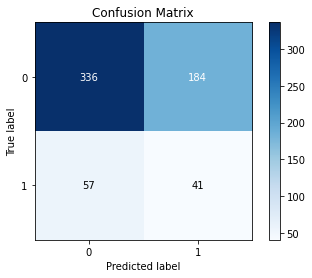

In [220]:
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);

In [221]:
# check f1-score
metrics.f1_score(y_test, new_pred_result)

0.2538699690402477

In [222]:
# compare to the old f-1 score
metrics.f1_score(y_test, pred_result)

0.22399999999999998

In [223]:
# check classification report result of new prediction result
pd.DataFrame(metrics.classification_report(y_test, new_pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.854962,0.182222,0.610032,0.518592,0.748281
recall,0.646154,0.418367,0.610032,0.532261,0.610032
f1-score,0.736035,0.253870,0.610032,0.494953,0.659575
support,520.000000,98.000000,0.610032,618.000000,618.000000


In [224]:
# check classification report result of old prediction result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not Response','Response'], output_dict=True))

,not Response,Response,accuracy,macro avg,weighted avg
precision,0.857868,0.518519,0.843042,0.688193,0.804055
recall,0.975000,0.142857,0.843042,0.558929,0.843042
f1-score,0.912691,0.224000,0.843042,0.568346,0.803481
support,520.000000,98.000000,0.843042,618.000000,618.000000


Model

Logistic Regression have accuracy about 0.84 which is greater than the treshold. So the model has the better result.

KNN

In [225]:
y = market_sampel_data['Response'].values
X = market_sampel_data.drop(['Response'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

KNeighborsClassifier param:

```python
sklearn.neighbors.KNeighborsClassifier(
  n_neighbors=5, 
  *, 
  weights='uniform', 
  algorithm='auto', 
  leaf_size=30, 
  p=2, 
  metric='minkowski', 
  metric_params=None, 
  n_jobs=None
)
```

In [226]:
# define k-nearest neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors = 3)
# fit model to data
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [227]:
# prediction
pred_result = knn_clf.predict(X_test)
pred_proba_result = knn_clf.predict_proba(X_test)

In [228]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,0.862369,0.340909,0.825243,0.601639,0.783053
recall,0.944656,0.159574,0.825243,0.552115,0.825243
f1-score,0.901639,0.217391,0.825243,0.559515,0.797563
support,524.000000,94.000000,0.825243,618.000000,618.000000


In [229]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.8252427184466019

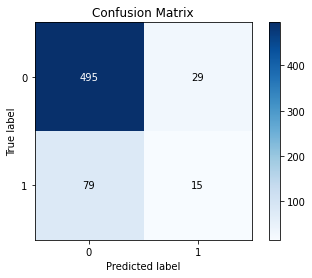

In [230]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


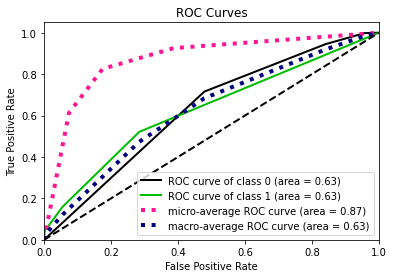

In [231]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

In [232]:
# check f1-score
metrics.f1_score(y_test, pred_result)

0.21739130434782608

Best Threshold=0.3333333333333333, G-Mean=0.6107790098415978


0.33561643835616434

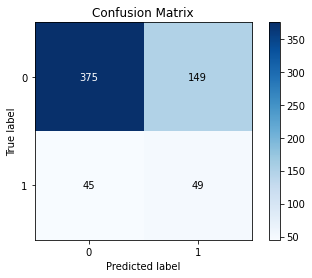

In [233]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);
# check f1-score
metrics.f1_score(y_test, new_pred_result)

From the KNN model that has been run, the accuracy value is 0.825

##### [METRIC MODEL EVALUATION] #####

Ketepatan Model Memprediksi : 0.825

[Matrix Confusion]
customer positif yang merespon campaign yang diprediksi Benar oleh Model sejumlah 375
customer positif yang merespon campaign yang diprediksi Salah oleh Model sejumlah 149
customer Negatif yang merespon campaign yang diprediksi Benar oleh Model sejumlah 45
Donatur Negatif yang merespon campaign yang diprediksi Salah oleh Model sejumlah 49

Nilai Recall sebesar 0.159574

Nilai F1 Score sebesar 0.217391 

# Naive Bayes

In [246]:
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler()
X_over, y_over = oversampling.fit_resample(X_train,y_train)

In [247]:
y = market_sampel_data['Response'].values
X = market_sampel_data.drop(['Response'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000
)

In [248]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [249]:
# prediction
pred_result = gnb.predict(X_test)
pred_proba_result = gnb.predict_proba(X_test)

In [250]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 618 points : 130


In [251]:
# check classification report result
pd.DataFrame(metrics.classification_report(y_test, pred_result, target_names=['not response','response'], output_dict=True))

,not response,response,accuracy,macro avg,weighted avg
precision,0.902041,0.359375,0.789644,0.630708,0.819499
recall,0.843511,0.489362,0.789644,0.666437,0.789644
f1-score,0.871795,0.414414,0.789644,0.643105,0.802226
support,524.000000,94.000000,0.789644,618.000000,618.000000


Navie bayes have accuracy about 0.789 which is lower than the treshold. So the model has the lower result.

In [252]:
# check model accuracy
metrics.accuracy_score(y_test, pred_result)

0.7896440129449838

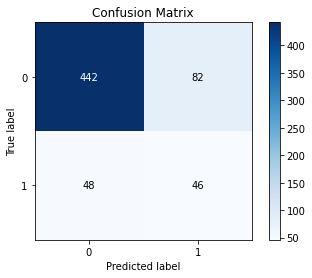

In [253]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, pred_result);

##### [METRIC MODEL EVALUATION] #####

Ketepatan Model Memprediksi : 0.789

[Matrix Confusion]
customer positif yang merespon campaign yang diprediksi Benar oleh Model sejumlah 442
customer positif yang merespon campaign yang diprediksi Salah oleh Model sejumlah 82
customer Negatif yang merespon campaign yang diprediksi Benar oleh Model sejumlah 48
Donatur Negatif yang merespon campaign yang diprediksi Salah oleh Model sejumlah 46

Nilai Recall sebesar 0.489362

Nilai F1 Score sebesar 0.414414

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


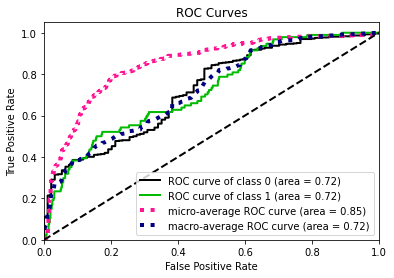

In [254]:
# check ROC-AUC curve and result
skplt.metrics.plot_roc_curve(y_test, pred_proba_result);

In [255]:
# check f1-score
metrics.f1_score(y_test, pred_result)

0.41441441441441446

Best Threshold=0.4223250020996862, G-Mean=0.65631513265649


0.4188034188034188

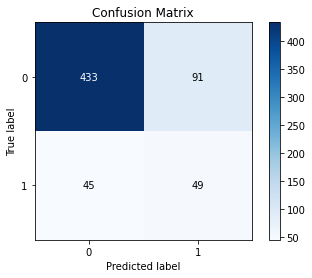

In [256]:
# find fpr and tpr using roc_curve() method
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_proba_result[:,1])
# calculate g-means
gmeans = np.sqrt(tpr * (1-fpr))
# find the best threshold
ix = np.argmax(gmeans)
print('Best Threshold={}, G-Mean={}'.format(thresholds[ix], gmeans[ix]))
# change predict proba result to optimized one using new threshold
new_pred_result = (pred_proba_result[:,1] >= thresholds[ix]).astype(int)
# visualize confusion matrix after setting new threshold
skplt.metrics.plot_confusion_matrix(y_test, new_pred_result);
# check f1-score
metrics.f1_score(y_test, new_pred_result)

**Conclusion
We can conclude the EDA and model**

EDA

Recent users are more likely Response campaign.

Logistic Regression is better model for this case than Navie bayes and KNN with about accuracy 0.852

REKOMENDASI :

> Dapat menggunakan model Logistic Regression untuk prediksi customer yang merespon campaign 